<a href="https://colab.research.google.com/github/BryanBrinez/DesarrolloAndBD/blob/main/Copia_de_ProyectoII_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn
import tensorflow as tf
import os
import kagglehub
import matplotlib.pyplot as plt

In [2]:
!kaggle datasets download -d jehanbhathena/weather-dataset


Dataset URL: https://www.kaggle.com/datasets/jehanbhathena/weather-dataset
License(s): CC0-1.0
100% 585M/587M [00:29<00:00, 19.2MB/s]
100% 587M/587M [00:29<00:00, 21.0MB/s]


In [3]:
!unzip weather-dataset.zip


Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: dataset/frost/3913.jpg  
  inflating: dataset/frost/3914.jpg  
  inflating: dataset/frost/3915.jpg  
  inflating: dataset/frost/3916.jpg  
  inflating: dataset/frost/3917.jpg  
  inflating: dataset/frost/3918.jpg  
  inflating: dataset/frost/3919.jpg  
  inflating: dataset/frost/3920.jpg  
  inflating: dataset/frost/3921.jpg  
  inflating: dataset/frost/3922.jpg  
  inflating: dataset/frost/3923.jpg  
  inflating: dataset/frost/3924.jpg  
  inflating: dataset/frost/3925.jpg  
  inflating: dataset/frost/3926.jpg  
  inflating: dataset/frost/3927.jpg  
  inflating: dataset/frost/3928.jpg  
  inflating: dataset/frost/3929.jpg  
  inflating: dataset/frost/3930.jpg  
  inflating: dataset/frost/3931.jpg  
  inflating: dataset/frost/3932.jpg  
  inflating: dataset/frost/3933.jpg  
  inflating: dataset/frost/3934.jpg  
  inflating: dataset/frost/3935.jpg  
  inflating: dataset/frost/3936.jpg  
  inflating: dataset/

In [4]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, save_img, load_img

# Función de Data Augmentation
def augment_image(image_path, output_path, augmentations=1):

    img = load_img(image_path)
    img_array = img_to_array(img)

    for i in range(augmentations):
        augmented_img = tf.image.random_flip_left_right(img_array)
        augmented_img = tf.image.random_flip_up_down(augmented_img)
        augmented_img = tf.image.random_brightness(augmented_img, max_delta=0.5)
        augmented_img = tf.image.random_contrast(augmented_img, lower=0.1, upper=2)

        # Guardar la imagen aumentada
        output_file = os.path.join(output_path, f"aug_{i}_{os.path.basename(image_path)}")
        save_img(output_file, augmented_img.numpy())

# Directorios de entrada y salida
base_dir = "dataset"
train_dir = "data/data_train"
test_dir = "data/data_test"
val_dir = "data/data_val"

# Paso 1: Borrar el contenido de las carpetas de destino si ya existen
for dir_path in [train_dir, test_dir, val_dir]:
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)  # Borra el contenido de la carpeta
    os.makedirs(dir_path)  # Vuelve a crear la carpeta vacía

# Cantidad mínima de imágenes por categoría
min_images_per_category = 800

# Paso 2: Recorrer cada categoría
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)

    if os.path.isdir(category_path):
        images = os.listdir(category_path)
        random.shuffle(images)

        # Calcular tamaños para entrenamiento, validación y prueba
        train_size = int(len(images) * 0.7)
        val_size = int(len(images) * 0.15)
        test_size = len(images) - train_size - val_size

        # Crear carpetas de destino para cada categoría en train, test y val
        train_category_dir = os.path.join(train_dir, category)
        test_category_dir = os.path.join(test_dir, category)
        val_category_dir = os.path.join(val_dir, category)
        os.makedirs(train_category_dir, exist_ok=True)
        os.makedirs(test_category_dir, exist_ok=True)
        os.makedirs(val_category_dir, exist_ok=True)

        # Copiar las imágenes de entrenamiento (70%)
        for image in images[:train_size]:
            src = os.path.join(category_path, image)
            dest = os.path.join(train_category_dir, image)
            shutil.copy(src, dest)  # Copiar en lugar de mover

        # Copiar las imágenes de validación (15%)
        for image in images[train_size:train_size + val_size]:
            src = os.path.join(category_path, image)
            dest = os.path.join(val_category_dir, image)
            shutil.copy(src, dest)  # Copiar en lugar de mover

        # Copiar las imágenes de prueba (15%)
        for image in images[train_size + val_size:]:
            src = os.path.join(category_path, image)
            dest = os.path.join(test_category_dir, image)
            shutil.copy(src, dest)  # Copiar en lugar de mover

        # Paso 3: Verificar y aumentar las imágenes en entrenamiento si son menos de 800
        train_images = os.listdir(train_category_dir)
        current_count = len(train_images)
        if current_count < min_images_per_category:
            print(f"Augmentando imágenes para la clase: {category}")
            needed_images = min_images_per_category - current_count
            augmentations_per_image = needed_images // current_count + 1

            for image in train_images:
                image_path = os.path.join(train_category_dir, image)
                augment_image(image_path, train_category_dir, augmentations=augmentations_per_image)

            # Recortar el exceso de imágenes si hay más de las necesarias
            final_images = os.listdir(train_category_dir)[:min_images_per_category]
            for extra_image in os.listdir(train_category_dir):
                if extra_image not in final_images:
                    os.remove(os.path.join(train_category_dir, extra_image))

print(f"Número de imágenes en entrenamiento: {sum([len(files) for r, d, files in os.walk(train_dir)])}")
print(f"Número de imágenes en validación: {sum([len(files) for r, d, files in os.walk(val_dir)])}")
print(f"Número de imágenes en prueba: {sum([len(files) for r, d, files in os.walk(test_dir)])}")


Augmentando imágenes para la clase: glaze
Augmentando imágenes para la clase: hail
Augmentando imágenes para la clase: rain
Augmentando imágenes para la clase: lightning
Augmentando imágenes para la clase: dew
Augmentando imágenes para la clase: frost
Augmentando imágenes para la clase: fogsmog
Augmentando imágenes para la clase: sandstorm
Augmentando imágenes para la clase: rainbow
Augmentando imágenes para la clase: snow
Número de imágenes en entrenamiento: 8812
Número de imágenes en validación: 1023
Número de imágenes en prueba: 1041


In [6]:
#Cargar dataset con tensorflow
images_train  =  tf.data.Dataset.list_files('data/data_train/*/*.jpg')
images_test  =  tf.data.Dataset.list_files('data/data_test/*/*.jpg')
images_val  =  tf.data.Dataset.list_files('data/data_val/*/*.jpg')


cant_categories  =  tf.data.Dataset.list_files('dataset/*/')


print(len(images_train))

print(len(images_test))

print(len(images_val))





8812
1041
1023


In [ ]:
for image in images_train.take(1):
    print(image)




tf.Tensor(b'data/data_train/fogsmog/4574.jpg', shape=(), dtype=string)


In [7]:

def preprocess_dataset(images, categories, target_height, target_width):

    # Crear un mapeo de categorías a índices
    category_to_index = tf.lookup.StaticHashTable(
        initializer=tf.lookup.KeyValueTensorInitializer(
            keys=tf.constant(categories),
            values=tf.constant(list(range(len(categories))), dtype=tf.int64)
        ),
        default_value=-1
    )

    # Mapeo de procesamiento
    return images.map(
        lambda x: (
            x,  # Ruta del archivo
            tf.image.resize(  # Redimensionar y normalizar la imagen
                tf.image.decode_image(
                    tf.io.read_file(x), channels=3, expand_animations=False
                ),
                [target_height, target_width]
            ) / 255.0,
            tf.one_hot(category_to_index.lookup(tf.strings.split(x, os.path.sep)[-2]), depth=len(categories))  # Etiqueta one-hot
        )
    )


categories = ['dew', 'rain', 'rime', 'rainbow', 'hail', 'frost', 'snow', 'fogsmog', 'glaze', 'sandstorm', 'lightning']
target_height = 100
target_width = 100

#`images_train`, `images_test`, `images_val`
data_train = preprocess_dataset(images_train, categories, target_height, target_width)
data_test = preprocess_dataset(images_test, categories, target_height, target_width)
data_val = preprocess_dataset(images_val, categories, target_height, target_width)


tf.Tensor(b'data/data_val/sandstorm/3124.jpg', shape=(), dtype=string)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(11,), dtype=float32)


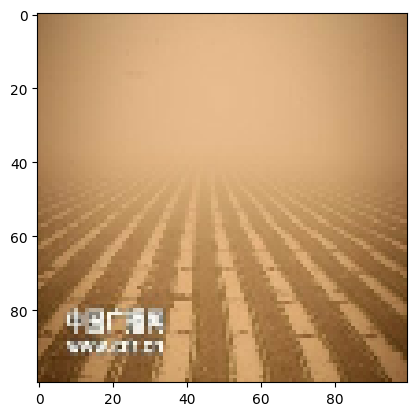

In [ ]:
#mostra algunos de la matriz de datos}
for ruta, image, cat in data_val.take(1):
    print(ruta)
    plt.imshow(image)
    print(cat)

In [ ]:
for image in data_train.take(1):
    print(image)

(<tf.Tensor: shape=(), dtype=string, numpy=b'data/data_train/rain/1660.jpg'>, <tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.9623549 , 0.96811175, 0.98169804],
        [0.9665314 , 0.97281176, 0.9759431 ],
        [0.9734314 , 0.9767353 , 0.98457843],
        ...,
        [0.2452057 , 0.21098001, 0.20230359],
        [0.14320682, 0.12853637, 0.11544432],
        [0.07396005, 0.07766021, 0.07848956]],

       [[0.9569942 , 0.9612196 , 0.96936864],
        [0.96273917, 0.97138435, 0.9849745 ],
        [0.9636471 , 0.97559804, 0.98255885],
        ...,
        [0.24085271, 0.21842165, 0.20370586],
        [0.12739502, 0.09791498, 0.09613433],
        [0.06515435, 0.07107797, 0.07239143]],

       [[0.96339214, 0.9590392 , 0.97995096],
        [0.96013725, 0.96340203, 0.97646075],
        [0.96318626, 0.96710783, 0.9827941 ],
        ...,
        [0.25313744, 0.22200976, 0.20588236],
        [0.11195002, 0.08901894, 0.08514614],
        [0.06145043, 0.06145043, 0.0614504

In [8]:

data_train = data_train.map(lambda x, y, z: (y, z))
data_test = data_test.map(lambda x, y, z: (y, z))
data_val = data_val.map(lambda x, y, z: (y, z))



In [ ]:
batch_size = 32
data_train = data_train.batch(batch_size).prefetch(tf.data.AUTOTUNE)
data_test = data_test.batch(batch_size).prefetch(tf.data.AUTOTUNE)
data_val = data_val.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
#Entrar el modelo con perceptron multicapa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Lambda, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses  import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Hiperparámetros configurables
input_shape = (100, 100, 3)  # Tamaño de las imágenes (100x100, a color)
num_classes = 11             # Número de clases en tu dataset (ajustar según el problema)
learning_rate = 0.00009        # Tasa de aprendizaje inicial
epochs = 30

# Crear el modelo
model2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(18, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),

    Conv2D(256, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
])

# Compilación del modelo
model2.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback para Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True
)


# Entrenamiento (suponiendo que `traindata` y `valdata` están preparados)
history2 = model1.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs,

    callbacks=[early_stopping]
)

# Resumen del modelo
model2.summary()






Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - accuracy: 0.2786 - loss: 2.0653 - val_accuracy: 0.4966 - val_loss: 1.4837
Epoch 2/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 32s 93ms/step - accuracy: 0.5397 - loss: 1.3430 - val_accuracy: 0.5748 - val_loss: 1.2773
Epoch 3/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.5883 - loss: 1.1819 - val_accuracy: 0.6188 - val_loss: 1.1927
Epoch 4/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.6151 - loss: 1.1194 - val_accuracy: 0.6305 - val_loss: 1.1421
Epoch 5/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 44s 97ms/step - accuracy: 0.6345 - loss: 1.0664 - val_accuracy: 0.6452 - val_loss: 1.0740
Epoch 6/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - accuracy: 0.6471 - loss: 1.0266 - val_accuracy: 0.6549 - val_loss: 1.0416
Epoch 7/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.6568 - loss: 0.9802 - val_accuracy: 0.6588 - val_loss: 1.0016
Epoch 8/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.6675 - loss: 0.9529 - val_accura

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 50, 50, 18)          │          10,386 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 25, 25, 18)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 25, 25, 18)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 23, 23, 256)         │          41,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      15,860,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 11)                  │           5,643 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,759,321 (182.19 MB)

 Trainable params: 15,919,773 (60.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,839,548 (121.46 MB)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

# Hiperparámetros configurables
input_shape = (100, 100, 3)
num_classes = 11
learning_rate = 0.0005
epochs = 30

# Crear el modelo
model1 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compilación del modelo
model1.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Callback para Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True
)



history1 = model3.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs,
    callbacks=[early_stopping]
)

model1.summary()

Epoch 1/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 44s 129ms/step - accuracy: 0.2356 - loss: 9.9433 - val_accuracy: 0.1681 - val_loss: 2.6544
Epoch 2/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 69s 101ms/step - accuracy: 0.4301 - loss: 1.7267 - val_accuracy: 0.5630 - val_loss: 1.2994
Epoch 3/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.5509 - loss: 1.3616 - val_accuracy: 0.5836 - val_loss: 1.2017
Epoch 4/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.6060 - loss: 1.1540 - val_accuracy: 0.6276 - val_loss: 1.3373
Epoch 5/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 27s 99ms/step - accuracy: 0.6776 - loss: 0.9574 - val_accuracy: 0.6129 - val_loss: 1.4343
Epoch 6/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.7245 - loss: 0.8595 - val_accuracy: 0.6139 - val_loss: 1.2289
Epoch 7/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 31s 113ms/step - accuracy: 0.7583 - loss: 0.7391 - val_accuracy: 0.7116 - val_loss: 0.8538
Epoch 8/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 37s 99ms/step - accuracy: 0.7895 - loss: 0.6391

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 100, 100, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 25, 25, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 11)                  │           5,643 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,054,552 (152.80 MB)

 Trainable params: 20,026,827 (76.40 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 20,026,829 (76.40 MB)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, recall_score, classification_report

# Generar predicciones del modelo
y_pred_prob = model2.predict(data_test)

# Convertir probabilidades en etiquetas (para multiclase)
y_pred = np.argmax(y_pred_prob, axis=1)

# Obtener etiquetas verdaderas
y_true = np.concatenate([y.numpy() for _, y in data_test], axis=0)
y_true = np.argmax(y_true, axis=1)  # Si es one-hot encoded

# Calcular métricas
recall = recall_score(y_true, y_pred, average='weighted')  # weighted/macro/micro según el caso
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step
Recall: 0.11
F1 Score: 0.11


In [ ]:
print(classification_report(y_true, y_pred, target_names=categories))


              precision    recall  f1-score   support

         dew       1.00      0.83      0.91         6
        rain       0.83      1.00      0.91         5
        rime       1.00      1.00      1.00         2
     rainbow       1.00      1.00      1.00         1
        hail       0.50      1.00      0.67         2
       frost       0.67      0.50      0.57         4
        snow       0.00      0.00      0.00         2
     fogsmog       1.00      1.00      1.00         2
       glaze       0.67      0.67      0.67         3
   sandstorm       0.80      1.00      0.89         4
   lightning       1.00      1.00      1.00         1

    accuracy                           0.81        32
   macro avg       0.77      0.82      0.78        32
weighted avg       0.78      0.81      0.79        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


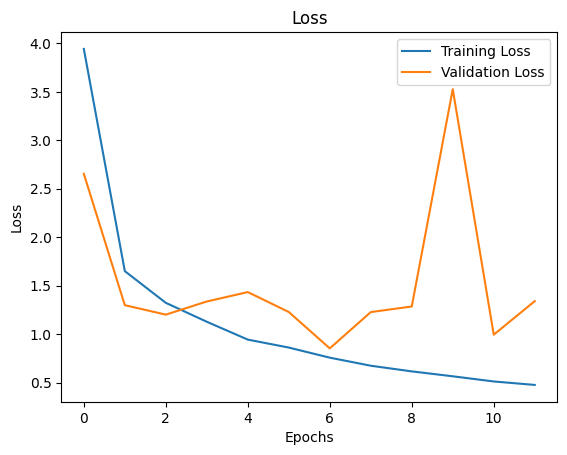

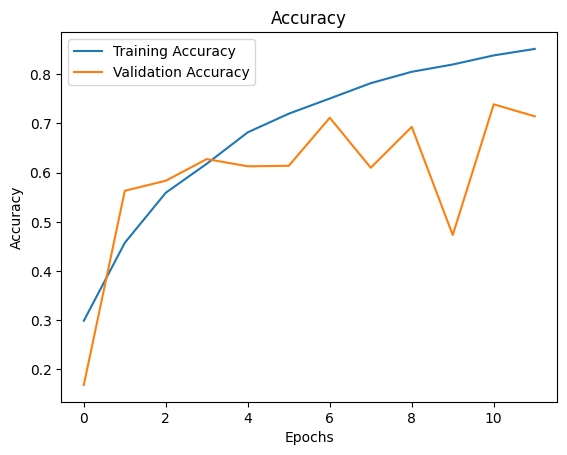

In [ ]:
import matplotlib.pyplot as plt

# Gráfica de pérdida (loss)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Gráfica de precisión (accuracy)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
#explicame estos graficos



In [ ]:
# Evaluación en los datos de prueba
test_loss, test_accuracy = model2.evaluate(data_val)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7164 - loss: 0.8533
Test Loss: 0.8538015484809875, Test Accuracy: 0.7116324305534363


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


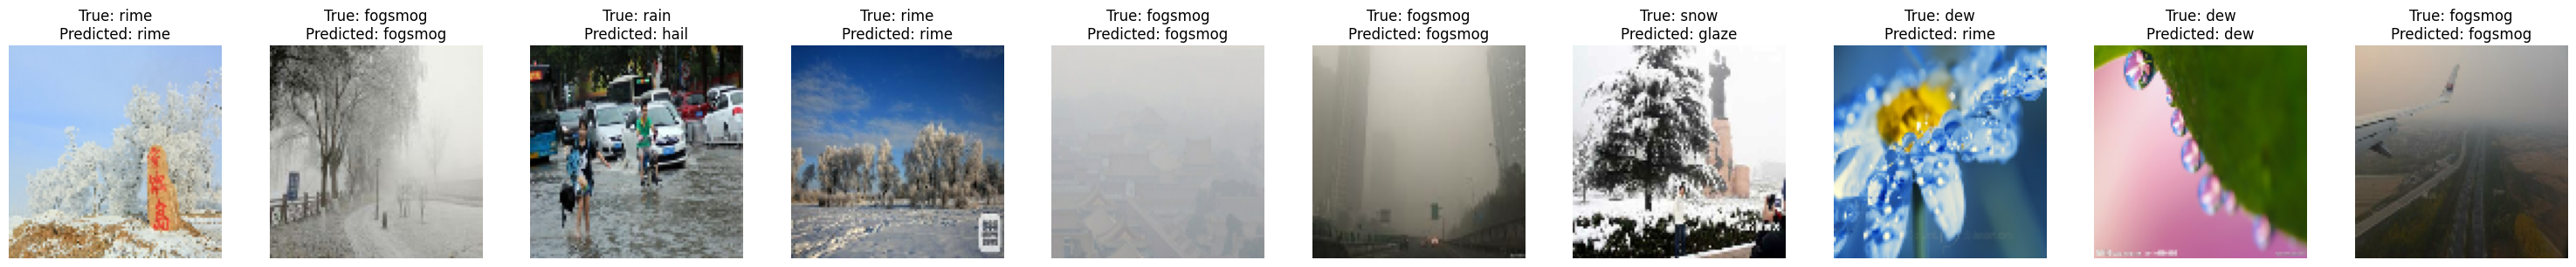

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def display_predictions(dataset, num_images=8):
  """
  Displays a grid of images with their true labels and predicted labels.

  Args:
      dataset: A TensorFlow dataset containing images and labels.
      num_images: The number of images to display.
  """

  # Get a batch of images and labels
  images, true_labels = next(iter(dataset.take(1)))

  # Make predictions
  predictions = model1.predict(images)

  # Get a subset of images and labels
  indices = np.random.choice(len(images), num_images, replace=False)
  images = images.numpy()[indices]
  true_labels = true_labels.numpy()[indices]
  predictions = predictions[indices]

  # Create a figure and axes
  fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))

  # Iterate over the images and plot them
  for i, ax in enumerate(axes):
    ax.imshow(images[i])

    # Convertir etiquetas a nombres de categorías
    true_label_name = categories[np.argmax(true_labels[i])]  # Obtener el nombre de la etiqueta verdadera
    predicted_label_name = categories[np.argmax(predictions[i])]  # Obtener el nombre de la etiqueta predicha

    ax.set_title(f"True: {true_label_name}\nPredicted: {predicted_label_name}")
    ax.axis("off")

  plt.tight_layout()
  plt.show()

# Call display_predictions after it's defined
display_predictions(data_val, num_images=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


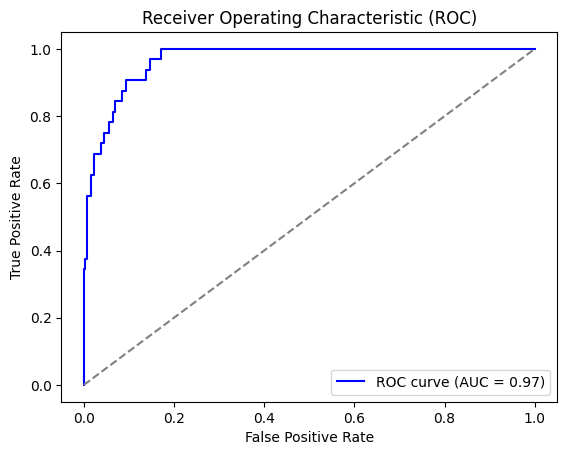

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Extraer un batch de imágenes y etiquetas verdaderas del conjunto de validación
images, true_labels = next(iter(data_val.take(1)))

# Generar predicciones como probabilidades
predictions = model1.predict(images)

# Aplanar etiquetas verdaderas y predicciones (para ROC)
true_labels_flat = tf.reshape(true_labels, [-1]).numpy()
predictions_flat = tf.reshape(predictions, [-1]).numpy()

# Calcular FPR, TPR y AUC
fpr, tpr, _ = roc_curve(true_labels_flat, predictions_flat)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()


[ 0  8  6  2  1  5  0  3  9  1  8  1  9  1  0  5  7  9  9  6  0  2 10  5
  0  7  1  0  8  4  5  4]


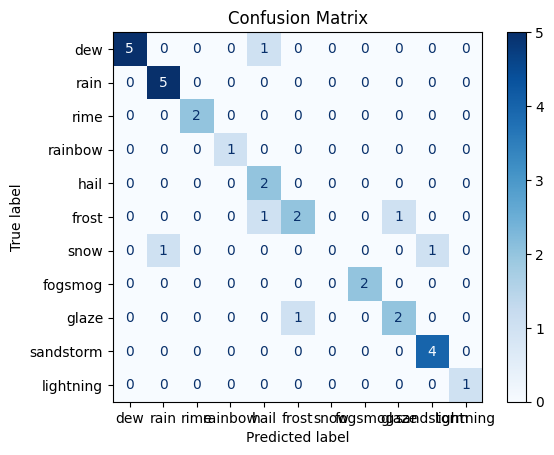

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convertir etiquetas reales y predicciones a índices de clases
y_true = tf.argmax(true_labels, axis=1).numpy()  # Índices de las etiquetas verdaderas
print(y_true)
y_pred = tf.argmax(predictions, axis=1).numpy()  # Índices de las predicciones

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)

# Mostrar la matriz de confusión
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()